In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
)

In [2]:
np.random.seed(42)
n_samples = 42

covariances = [
    [[1, 0.7], [0.7, 1]],
    [[1, -0.7], [-0.7, 1]] 
]

means = [
    [-0.25, -1], 
    [2, 1]
]

# multivariate X distributions with different covariances
X = [
    np.random.multivariate_normal(mean=mean, cov=cov, size=n_samples)
    for mean, cov in zip(means, covariances)
]
X = np.vstack(tuple(X))

# y for multivariate X distributions 1 or 2
y = [
    np.full(n_samples, distribution, dtype=int) 
    for distribution in range(1, 3)
]
y = np.hstack(y)

In [3]:
data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y})

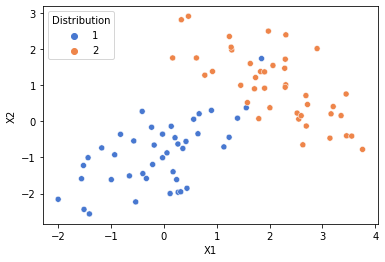

In [4]:
x1_x2_scatterplot = sns.scatterplot(
    data=data, 
    x='X1', 
    y='X2', 
    hue='y',
    palette='muted'
)
x1_x2_scatterplot.legend(title='Distribution')
plt.show()

In [5]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X, y)
qda_classifier.score(X, y) # QDA training score

0.9761904761904762

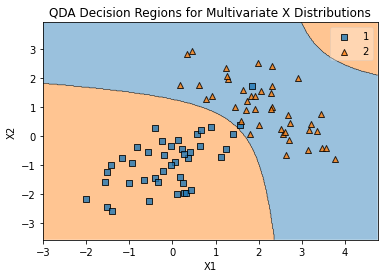

In [6]:
plot_decision_regions(X, y, clf=qda_classifier, hide_spines=False)
plt.title('QDA Decision Regions for Multivariate X Distributions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [7]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X, y)
lda_classifier.score(X, y) # LDA training score - QDA better approximation for Bayes(?)

0.9523809523809523

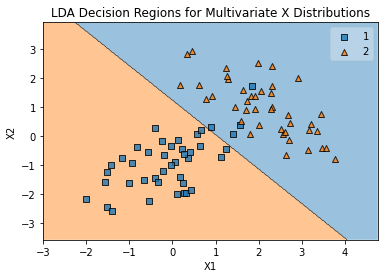

In [8]:
plot_decision_regions(X, y, clf=lda_classifier, hide_spines=False)
plt.title('LDA Decision Regions for Multivariate X Distributions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()